In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



In [5]:
image_path = "../output_videos/cropped_imgage.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


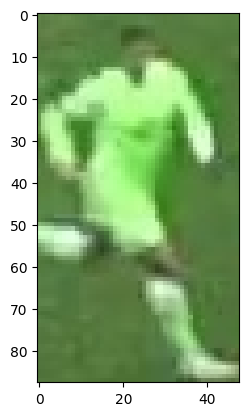

In [6]:
plt.imshow(image)

In [7]:
# take the top half of the image
top_half = image[0: int(image.shape[0]/2), :]

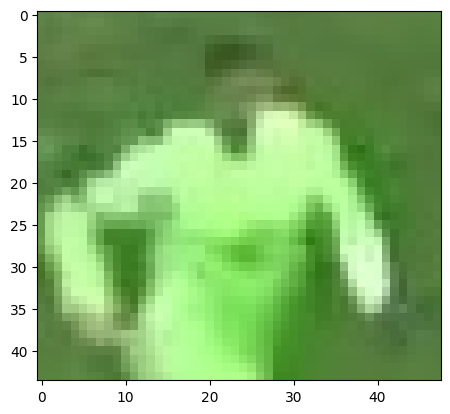

In [8]:
plt.imshow(top_half)
plt.show()

In [10]:
from sklearn.cluster import KMeans 

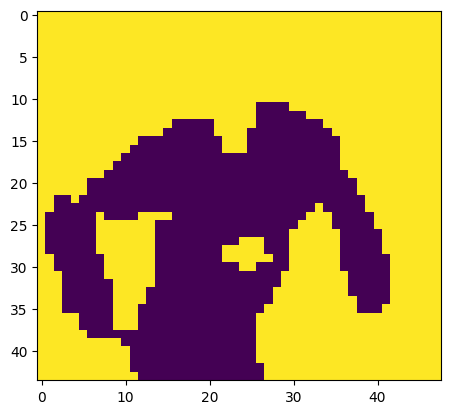

In [12]:
#cluester the image into two clusters
#reshape image into 2d array
image_2d = top_half.reshape(-1, 3)

#perform kmeans clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
kmeans.fit(image_2d)

#get the cluster labels
labels = kmeans.labels_

#reshape the labels into the original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [13]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [15]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [16]:
kmeans.cluster_centers_[player_cluster]

array([170.46278755, 235.93369418, 142.24898512])